# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [21]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import json
import os

# Import linear regression and display functions
from scipy.stats import linregress
from IPython.display import display

# Import citipy
from citipy import citipy

# Import API key
from config import weather_api_key


## Generate Cities List

In [26]:
# Generate latitudes and longitudes over full range of values
# Use uniform distribution to ensure a uniform spread of values
# Generate 1500 combinations to have enough data to find more than 500 cities
latitudes = np.random.uniform(-90, 90,1500)
longitudes = np.random.uniform(-180, 180,1500)

# Set up empty lists to hold the cities and the countries they are located in
cities = []
countries = []

# Loop over the set of latitudes and longitudes (list lengths are the same)
for i in range(0,len(latitudes)):
    
    # Use Citipy library to return the nearest city for the given latitude and longitude pair
    city = citipy.nearest_city(latitudes[i], longitudes[i])
    
    # Correctly capitalise city name with title case
    current_city = city.city_name.title()
    
    # Use Citipy to return the country code for the city and convert to uppercase
    current_country = city.country_code.upper()
    
    # Check to see if the city found is already in the list of cities
    # Need to do this to ensure a set of unique cities
    if current_city not in cities:
        
        # If the city is not already in the list, append it to the list of cities
        cities.append(current_city)
        
        # If the city is not in the list, append its country code to the list of countries
        countries.append(current_country)
    
# Print out the number of unique cities found to ensure a set greater 500
# Need more than 500 cities as some cities' weather will not be available via OpenWeather API
print(f"Number of cities = {len(cities)}")


Number of cities = 630


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [28]:
# Intiliase indexes to keep track of city sets and city index i.e. place in list
city_index = 0
city_set_index = 0

# Initialise the number of cities weather cannnot be found for
cities_not_found = 0

# Split the list of cities into sets of 50 or less
# Adapted from:
# https://www.geeksforgeeks.org/break-list-chunks-size-n-python/
city_sets = [cities[i:i + 50] for i in range(0, len(cities), 50)]

# Split the list of countries into sets of 50 also to match the cities
country_sets = [countries[i:i + 50] for i in range(0, len(countries), 50)] 

# Initialise empty lists for longitude, latitude, max temperature, humidity, cloudiness, wind speed and date
longitude_all = []
latitude_all = []
temperature_max_all = []
humidity_all = []
cloudiness_all = []
wind_speed_all = []
date_all = []

# Intialise empty lists for the resulting lists of cities and countries after processing
city_all = []
country_all = []

# Print out heading for data retrieval with API calls
print("Beginning Data Retrieval")     
print("-----------------------------")

# Set up base URL for OpenWeather API
url = "http://api.openweathermap.org/data/2.5/weather?"

# Set units to imperial as temperature is to be reported in Fahrenheit degrees
units = "imperial"

# Construct further parts of base URL with API key and units
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Loop through each of the city sets
for city_set in city_sets:
    
    # Initialise the current city index to 0 for printing out processing information and accessing country code
    city_index = 0
    
    # Loop through each city in the current set
    for city in city_set:
        
        # Display processing information with set number and city number and associated country code in that set
        print(f"Processing Record {city_index+1} of Set {city_set_index+1} | {city}, {country_sets[city_set_index][city_index]}")
        
        # Make the request for the JSON data from OpenWeather
        # Add city name to query URL to access correct data
        response = requests.get(query_url + city).json()
        
        # Use try and except to catch any cities whose weather is not available via API
        try:
            
            # Collect values needed for lists and later DataFrame for analysis and plotting
            # Values collected indicated by starter Jupyter notebook file
            # Displayed data previously to learn data structure and hence access required data
            longitude = response["coord"]["lon"]
            latitude = response["coord"]["lat"]
            temperature_max_F = response["main"]["temp_max"]
            humidity = response["main"]["humidity"]
            cloudiness = response["clouds"]["all"]
            wind_speed = response["wind"]["speed"]
            date = response["dt"]
            
            # Append all the values to the various lists of values
            longitude_all.append(longitude)
            latitude_all.append(latitude)
            temperature_max_all.append(temperature_max_F)
            humidity_all.append(humidity)
            cloudiness_all.append(cloudiness)
            wind_speed_all.append(wind_speed)
            date_all.append(date)
            
            # Append the city name and country code to those lists also
            city_all.append(city)
            country_all.append(country_sets[city_set_index][city_index])
            
        # Use except for when a city is not found in OpenWeather
        except:
            
            # Display message indicating the city has been skipped
            print(f"City not found. Skipping...")
            
            # Increment number of cities not found to keep track and again ensure 500 or more cities
            cities_not_found = cities_not_found + 1
            
            pass
        
        # Increment index for city by 1 to keep track of position in list
        city_index = city_index + 1
        
    # After processing all cities in current set, increment city_set_index by 1 to move to next set
    # and to display processing information correctly
    city_set_index = city_set_index + 1

# Display number of cities not found by OpenWeather API
# Display this number to again check for 500 or more cities' weather
print(f"Cities not found = {cities_not_found}")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | Yar-Sale, RU
Processing Record 2 of Set 1 | Wenling, CN
Processing Record 3 of Set 1 | Birjand, IR
Processing Record 4 of Set 1 | Tessalit, ML
Processing Record 5 of Set 1 | Rikitea, PF
Processing Record 6 of Set 1 | Kavieng, PG
Processing Record 7 of Set 1 | Yellowknife, CA
Processing Record 8 of Set 1 | Port Alfred, ZA
Processing Record 9 of Set 1 | Mahibadhoo, MV
Processing Record 10 of Set 1 | Busselton, AU
Processing Record 11 of Set 1 | Brae, GB
Processing Record 12 of Set 1 | Zhigansk, RU
Processing Record 13 of Set 1 | Mwingi, KE
Processing Record 14 of Set 1 | Hermanus, ZA
Processing Record 15 of Set 1 | Butaritari, KI
Processing Record 16 of Set 1 | Jamestown, SH
Processing Record 17 of Set 1 | Barrow, US
Processing Record 18 of Set 1 | Khatanga, RU
Processing Record 19 of Set 1 | Alexandria, EG
Processing Record 20 of Set 1 | Pascagoula, US
Processing Record 21 of Set 1 | Bredasdorp, ZA
Pro

Processing Record 26 of Set 4 | Burnie, AU
Processing Record 27 of Set 4 | Quatre Cocos, MU
Processing Record 28 of Set 4 | Severodvinsk, RU
Processing Record 29 of Set 4 | Tsihombe, MG
City not found. Skipping...
Processing Record 30 of Set 4 | Arman, RU
Processing Record 31 of Set 4 | Namibe, AO
Processing Record 32 of Set 4 | Maposeni, TZ
Processing Record 33 of Set 4 | Provideniya, RU
Processing Record 34 of Set 4 | Ampanihy, MG
Processing Record 35 of Set 4 | Lebu, CL
Processing Record 36 of Set 4 | Maturin, VE
Processing Record 37 of Set 4 | Laguna, BR
Processing Record 38 of Set 4 | Huarmey, PE
Processing Record 39 of Set 4 | Thompson, CA
Processing Record 40 of Set 4 | Barentsburg, SJ
City not found. Skipping...
Processing Record 41 of Set 4 | Chuy, UY
Processing Record 42 of Set 4 | Hazorasp, UZ
Processing Record 43 of Set 4 | Solsvik, NO
City not found. Skipping...
Processing Record 44 of Set 4 | Ixtapa, MX
Processing Record 45 of Set 4 | Belushya Guba, RU
City not found. Ski

Processing Record 45 of Set 7 | Datong, CN
Processing Record 46 of Set 7 | Kiruna, SE
Processing Record 47 of Set 7 | Alice Springs, AU
Processing Record 48 of Set 7 | Thunder Bay, CA
Processing Record 49 of Set 7 | Nguiu, AU
City not found. Skipping...
Processing Record 50 of Set 7 | Faanui, PF
Processing Record 1 of Set 8 | Casa Grande, US
Processing Record 2 of Set 8 | Krasnoshchekovo, RU
Processing Record 3 of Set 8 | Adrar, DZ
Processing Record 4 of Set 8 | Tome, CL
Processing Record 5 of Set 8 | Cao Bang, VN
Processing Record 6 of Set 8 | Kaeo, NZ
Processing Record 7 of Set 8 | Lai, TD
Processing Record 8 of Set 8 | Tungkang, TW
City not found. Skipping...
Processing Record 9 of Set 8 | Maniwaki, CA
Processing Record 10 of Set 8 | Aykhal, RU
Processing Record 11 of Set 8 | Hermiston, US
Processing Record 12 of Set 8 | Kidal, ML
Processing Record 13 of Set 8 | Novaya Bryan, RU
Processing Record 14 of Set 8 | Hasaki, JP
Processing Record 15 of Set 8 | Tabou, CI
Processing Record 16

Processing Record 18 of Set 11 | Cockburn Town, TC
Processing Record 19 of Set 11 | Port Lincoln, AU
Processing Record 20 of Set 11 | Gorakhpur, IN
Processing Record 21 of Set 11 | Kungsbacka, SE
Processing Record 22 of Set 11 | Terrenate, MX
Processing Record 23 of Set 11 | Puerto Leguizamo, CO
Processing Record 24 of Set 11 | Gari, RU
Processing Record 25 of Set 11 | Lalomanu, WS
City not found. Skipping...
Processing Record 26 of Set 11 | Viligili, MV
City not found. Skipping...
Processing Record 27 of Set 11 | Wageningen, SR
Processing Record 28 of Set 11 | Grand River South East, MU
City not found. Skipping...
Processing Record 29 of Set 11 | Pyay, MM
Processing Record 30 of Set 11 | Farafangana, MG
Processing Record 31 of Set 11 | Barra Dos Coqueiros, BR
Processing Record 32 of Set 11 | Vila Franca Do Campo, PT
Processing Record 33 of Set 11 | Valdemarpils, LV
Processing Record 34 of Set 11 | Churachandpur, IN
Processing Record 35 of Set 11 | Cuiluan, CN
Processing Record 36 of S

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [29]:
# Of an initial 630 cities, data was not retrieved for 50
# 630-50 = 580 cities, enough data for this analysis

# Create DataFrame from lists of data
# Column headings and order of columns given in starter Jupyter notebook
weather_data_all = pd.DataFrame({
                                    "City" : city_all,
                                    "Lat" : latitude_all,
                                    "Lng" : longitude_all,
                                    "Max Temp" : temperature_max_all,
                                    "Humidity" : humidity_all,
                                    "Cloudiness" : cloudiness_all,
                                    "Wind Speed" : wind_speed_all,
                                    "Country" : country_all
                                })

# Display DataFrame preview
display(weather_data_all)

# Save DataFrame to CSV file in directory output_data
weather_data_all.to_csv("output_data/cities.csv")


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,Yar-Sale,66.83,70.83,22.41,95,6,8.95,RU
1,Wenling,28.37,121.36,66.00,85,100,9.48,CN
2,Birjand,32.87,59.22,73.40,5,0,9.17,IR
3,Tessalit,20.20,1.01,97.95,10,0,10.07,ML
4,Rikitea,-23.12,-134.97,74.07,81,54,21.05,PF
...,...,...,...,...,...,...,...,...
575,Noumea,-22.28,166.46,60.80,87,0,6.93,NC
576,Port Moresby,-9.44,147.18,78.80,88,75,11.41,PG
577,Bang Lamung,13.05,100.93,81.00,84,100,4.14,TH
578,Pizarro,4.95,-77.37,80.20,79,100,4.54,CO


In [30]:
# Create summary statistics for numerical weather data via Pandas' describe function
summary_weather_statistics = weather_data_all.describe()

# Display the summary statistics DataFrame
summary_weather_statistics


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000
mean,20.527190,20.551793,61.848810,69.618966,49.375862,8.347966
std,33.531904,89.916925,22.268182,22.966928,39.082881,5.270451
min,-54.800000,-175.200000,6.800000,5.000000,0.000000,0.220000
25%,-7.952500,-60.722500,43.860000,59.000000,5.000000,4.290000
50%,25.020000,24.910000,66.200000,75.000000,45.000000,7.530000
75%,49.362500,100.342500,80.170000,87.000000,90.000000,11.410000
max,78.220000,179.320000,105.600000,100.000000,100.000000,28.860000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [31]:
# Get the list of cities that have humidity over 100%
# Using Pandas loc function to list all rows matching logical condition
weather_data_all.loc[weather_data_all["Humidity"] > 100]


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country


In [32]:
# Did not find any cities with humidity greater than 100%
# Leaving this step in for completeness and later possible use of code

# Make a new DataFrame equal to the city data to drop all humidity outliers
# Clean DataFrame named clean_city_data
clean_city_data = weather_data_all[weather_data_all["Humidity"] <= 100]


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

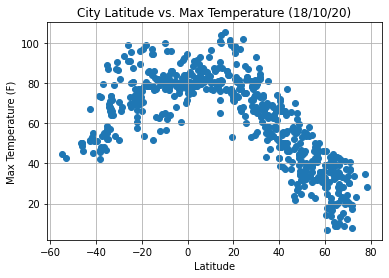

In [37]:
# Plot a scatter plot for latitude versus max temperature
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], marker="o")

# Set the grpah title
plt.title("City Latitude vs. Max Temperature (18/10/20)")

# Set the labels for the x and y-axis
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Display the grid on the plot
plt.grid(True)

# Save the plot as a PNG file to directory output_data
plt.savefig("output_data/Latitude_vs_Max_Temp.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

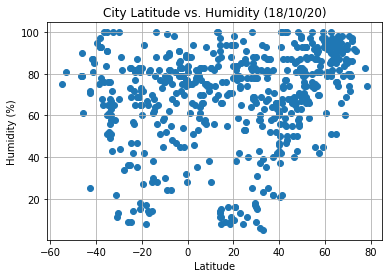

In [38]:
# Plot a scatter plot for latitude versus humidity
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], marker="o")

# Set the grpah title
plt.title("City Latitude vs. Humidity (18/10/20)")

# Set the labels for the x and y-axis
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Display the grid on the plot
plt.grid(True)

# Save the plot as a PNG file to directory output_data
plt.savefig("output_data/Latitude_vs_Humidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

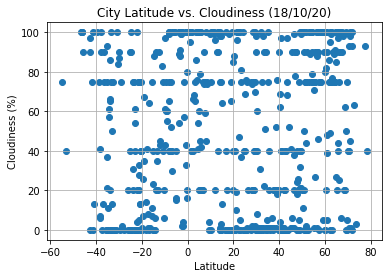

In [39]:
# Plot a scatter plot for latitude versus cloudiness
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], marker="o")

# Set the grpah title
plt.title("City Latitude vs. Cloudiness (18/10/20)")

# Set the labels for the x and y-axis
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Display the grid on the plot
plt.grid(True)

# Save the plot as a PNG file to directory output_data
plt.savefig("output_data/Latitude_vs_Cloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

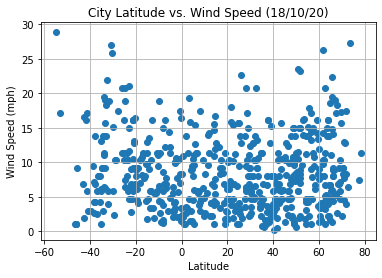

In [40]:
# Plot a scatter plot for latitude versus wind speed
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], marker="o")

# Set the grpah title
plt.title("City Latitude vs. Wind Speed (18/10/20)")

# Set the labels for the x and y-axis
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Display the grid on the plot
plt.grid(True)

# Save the plot as a PNG file to directory output_data
plt.savefig("output_data/Latitude_vs_Wind_Speed.png")

# Show plot
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The rvalue is: -0.8855977452359118


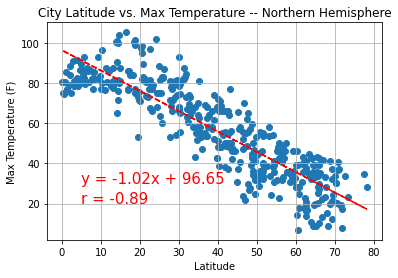

In [66]:
# Extract the Northern Hemisphere latitude and max temperature data
latitude_nh_values = weather_data_all.loc[weather_data_all["Lat"] >= 0,["Lat"]]
maxtemp_nh_values = weather_data_all.loc[weather_data_all["Lat"] >= 0,["Max Temp"]]

# Determine the linear regression model for latitude (x-value) and max temperature (y-value)
# Need .iloc[:,0] to ensure extracting 1D data
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(latitude_nh_values.iloc[:,0], maxtemp_nh_values.iloc[:,0])

# Use the equation to determine the list of y-values from the given x-values so these can also be plotted
regress_values = latitude_nh_values * slope + intercept

# Create string for expression linear regression equation 
# Round slope and intercept to two decimal places
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Display also the calculated rvalue for the linear regression
print(f"The rvalue is: {rvalue}")

# Replot the scatter plot for just the Northern Hemisphere data
# Plot a scatter plot for latitude versus max temperature
plt.scatter(latitude_nh_values, maxtemp_nh_values, marker="o")

# Plot the values determined from the linear regression equation
# Plot in red with double dashes to differentiate from blue dots of scatter plot
plt.plot(latitude_nh_values.iloc[:,0], regress_values,"r--")

# Set the grpah title
plt.title("City Latitude vs. Max Temperature -- Northern Hemisphere")

# Set the labels for the x and y-axis
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Annotate the plot with the linear regression equation and r-value
# Place in empty area of plot with increased font size and in red
plt.annotate(line_eq,(5,30),fontsize=15,color="red")
plt.annotate(f"r = {round(rvalue,2)}",(5,20),fontsize=15,color="red")

# Display the grid on the plot
plt.grid(True)

# Show plot
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The rvalue is: 0.5882758537086262


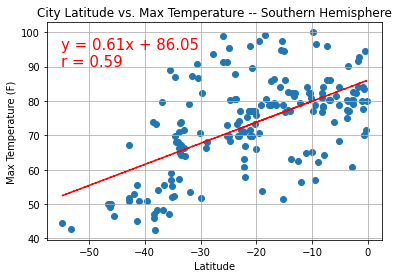

In [73]:
# Extract the Souther Hemisphere latitude and max temperature data
latitude_sh_values = weather_data_all.loc[weather_data_all["Lat"] < 0,["Lat"]]
maxtemp_sh_values = weather_data_all.loc[weather_data_all["Lat"] < 0,["Max Temp"]]

# Determine the linear regression model for latitude (x-value) and max temperature (y-value)
# Need .iloc[:,0] to ensure extracting 1D data
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(latitude_sh_values.iloc[:,0], maxtemp_sh_values.iloc[:,0])

# Use the equation to determine the list of y-values from the given x-values so these can also be plotted
regress_values = latitude_sh_values * slope + intercept

# Create string for expression linear regression equation 
# Round slope and intercept to two decimal places
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Display also the calculated rvalue for the linear regression
print(f"The rvalue is: {rvalue}")

# Replot the scatter plot for just the Southern Hemisphere data
# Plot a scatter plot for latitude versus max temperature
plt.scatter(latitude_sh_values, maxtemp_sh_values, marker="o")

# Plot the values determined from the linear regression equation
# Plot in red with double dashes to differentiate from blue dots of scatter plot
plt.plot(latitude_sh_values.iloc[:,0], regress_values,"r--")

# Set the grpah title
plt.title("City Latitude vs. Max Temperature -- Southern Hemisphere")

# Set the labels for the x and y-axis
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Annotate the plot with the linear regression equation and r-value
# Place in empty area of plot with increased font size and in red
plt.annotate(line_eq,(-55,95),fontsize=15,color="red")
plt.annotate(f"r = {round(rvalue,2)}",(-55,90),fontsize=15,color="red")

# Display the grid on the plot
plt.grid(True)

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The rvalue is: 0.3365777809978751


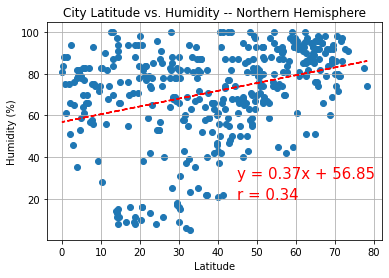

In [77]:
# Extract the Northern Hemisphere latitude and humidity data
latitude_nh_values = weather_data_all.loc[weather_data_all["Lat"] >= 0,["Lat"]]
humidity_nh_values = weather_data_all.loc[weather_data_all["Lat"] >= 0,["Humidity"]]

# Determine the linear regression model for latitude (x-value) and humidity (y-value)
# Need .iloc[:,0] to ensure extracting 1D data
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(latitude_nh_values.iloc[:,0], humidity_nh_values.iloc[:,0])

# Use the equation to determine the list of y-values from the given x-values so these can also be plotted
regress_values = latitude_nh_values * slope + intercept

# Create string for expression linear regression equation 
# Round slope and intercept to two decimal places
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Display also the calculated rvalue for the linear regression
print(f"The rvalue is: {rvalue}")

# Replot the scatter plot for just the Northern Hemisphere data
# Plot a scatter plot for latitude versus max temperature
plt.scatter(latitude_nh_values, humidity_nh_values, marker="o")

# Plot the values determined from the linear regression equation
# Plot in red with double dashes to differentiate from blue dots of scatter plot
plt.plot(latitude_nh_values.iloc[:,0], regress_values,"r--")

# Set the grpah title
plt.title("City Latitude vs. Humidity -- Northern Hemisphere")

# Set the labels for the x and y-axis
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Annotate the plot with the linear regression equation and r-value
# Place in empty area of plot with increased font size and in red
plt.annotate(line_eq,(45,30),fontsize=15,color="red")
plt.annotate(f"r = {round(rvalue,2)}",(45,20),fontsize=15,color="red")

# Display the grid on the plot
plt.grid(True)

# Show plot
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The rvalue is: -0.05464694419505632


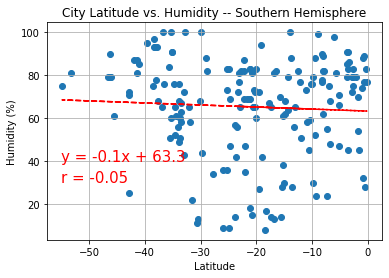

In [80]:
# Extract the Southern Hemisphere latitude and humidity data
latitude_sh_values = weather_data_all.loc[weather_data_all["Lat"] < 0,["Lat"]]
humidity_sh_values = weather_data_all.loc[weather_data_all["Lat"] < 0,["Humidity"]]

# Determine the linear regression model for latitude (x-value) and humidity (y-value)
# Need .iloc[:,0] to ensure extracting 1D data
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(latitude_sh_values.iloc[:,0], humidity_sh_values.iloc[:,0])

# Use the equation to determine the list of y-values from the given x-values so these can also be plotted
regress_values = latitude_sh_values * slope + intercept

# Create string for expression linear regression equation 
# Round slope and intercept to two decimal places
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Display also the calculated rvalue for the linear regression
print(f"The rvalue is: {rvalue}")

# Replot the scatter plot for just the Southern Hemisphere data
# Plot a scatter plot for latitude versus max temperature
plt.scatter(latitude_sh_values, humidity_sh_values, marker="o")

# Plot the values determined from the linear regression equation
# Plot in red with double dashes to differentiate from blue dots of scatter plot
plt.plot(latitude_sh_values.iloc[:,0], regress_values,"r--")

# Set the grpah title
plt.title("City Latitude vs. Humidity -- Southern Hemisphere")

# Set the labels for the x and y-axis
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Annotate the plot with the linear regression equation and r-value
# Place in empty area of plot with increased font size and in red
plt.annotate(line_eq,(-55,40),fontsize=15,color="red")
plt.annotate(f"r = {round(rvalue,2)}",(-55,30),fontsize=15,color="red")

# Display the grid on the plot
plt.grid(True)

# Show plot
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


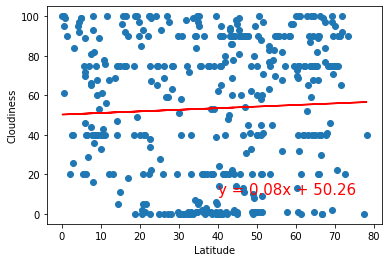

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


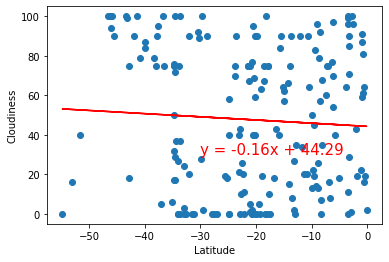

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


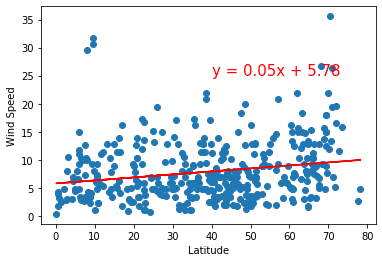

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


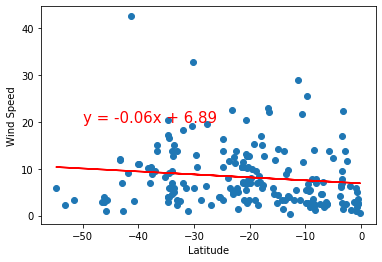